# Bolt Take Home test 

**Goal:** Understand if our supply volume matches the demand that we have. If it does not, we need to pinpoint the peak hours and come up with recommended actions.

# Supply 

In my own words, I would define Supply as the optimal amount of resources to convert all demand into revenue. Ideally, every user that visits Bolt would have 100% coverage, be able to have the ride accepted quickly and reach the destination. However, due to several reasons, i.e. competiotion, traffic, seasonality, events or lack of drivers, it is not always possible to capture 100% of demand.

To define supply we have several candidates: 
1. Active Drivers - over estimation of supply. Why ? Being active does not mean available for pick-up. If all active drivers are busy, supply is still low.
2. Finished Rides - 
3. Free Drivers - A part of Active Drivers is busy (has a booking), so we can normalize Active developers by how busy they are. 

We will go with option 3.

# Demand 

We are defining demand as the numbers riders interested in taking a trip.

There are two groups in this category: 
- Riders that saw 0 cars
- Riders that saw +1 cars 

## Q1: Identify peak times of undersupply

## Q2: Calculate the number of online hours required to ensure that we have a good Coverage Ratio durin peak hours 

## Q3: Calculate how much earning we can guarantee so that we can attract more supply. 

In [672]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

supply = pd.read_csv("supply.csv")
demand = pd.read_csv("demand.csv")

In [673]:
# joining the table to see both supply & demand in one df
supply = supply.set_index('Date')
demand = demand.set_index('Date')

sd = pd.concat([supply, demand], axis=1, join="inner")
sd = sd.fillna(0)
sd.reset_index(inplace=True)

In [674]:
sd['Date'] = pd.to_datetime(sd['Date'])
sd['Hour'] = sd['Date'].dt.hour
sd["Day of Week"] = sd['Date'].dt.dayofweek
sd["Is Weekend"] = sd['Date'].dt.dayofweek > 4
sd['Is Holyday'] = sd['Date'] > '2016-12-12'
sd['Date'] = sd['Date'].dt.date

sd['Demand'] = sd['People saw 0 cars (unique)'] + sd['People saw +1 cars (unique)']
busy_ratio = (sd['Has booking (h)'] / sd['Online (h)'])
sd['Free Drivers'] = sd['Active drivers'] * (1-busy_ratio)

#supply['Online time per driver'] = supply['Online (h)'] / supply['Active drivers']
#supply['Booking time per driver'] = supply['Has booking (h)'] / supply['Active drivers']
#supply['Waiting time per driver'] = supply['Waiting for booking (h)'] / supply['Active drivers']


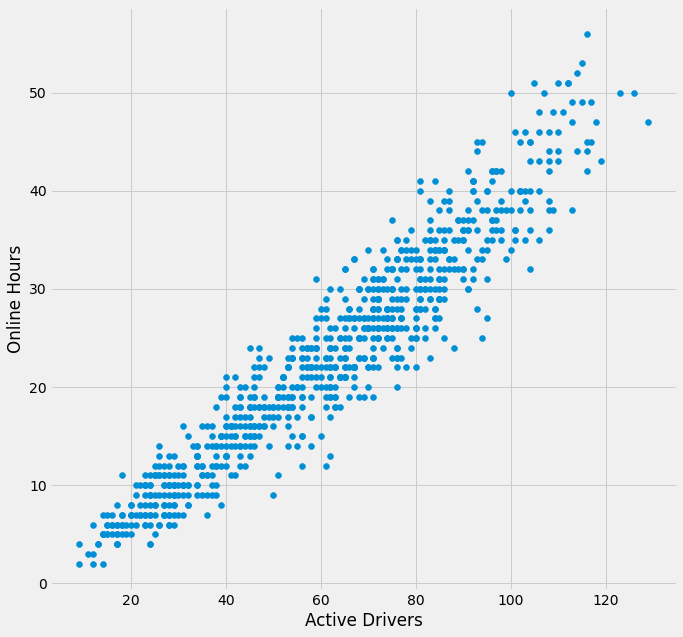

In [675]:
# investigate if there is a linear relationship between active drivers and Online hours.

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(sd['Active drivers'], sd['Online (h)'])
plt.xlabel("Active Drivers")
plt.ylabel("Online Hours")
plt.show()

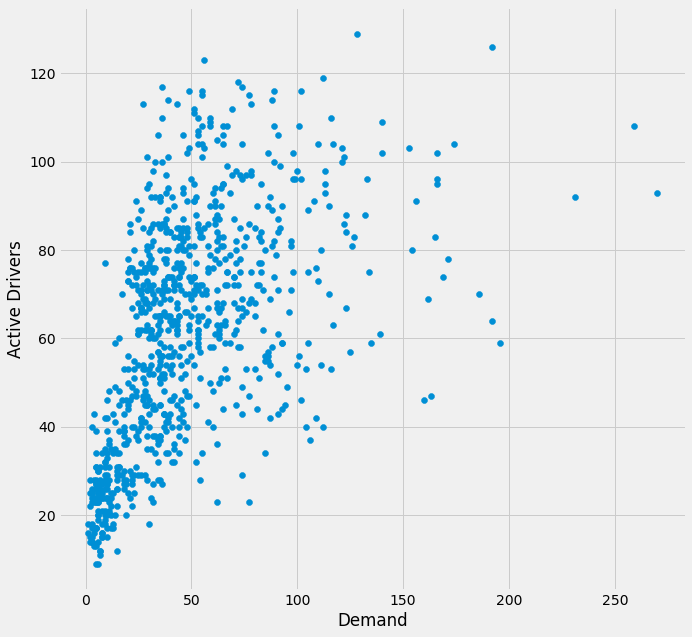

In [676]:
# investigate if there is a relation between high demand and business

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(sd['Demand'], sd['Active drivers'])
plt.xlabel("Demand")
plt.ylabel("Active Drivers")
plt.show()

It is expected that, as demand increases, the number of drivers also increases. Although the relationship is not linear. However, as there is more demand, drivers will get busier and spend less time waiting for bookings.

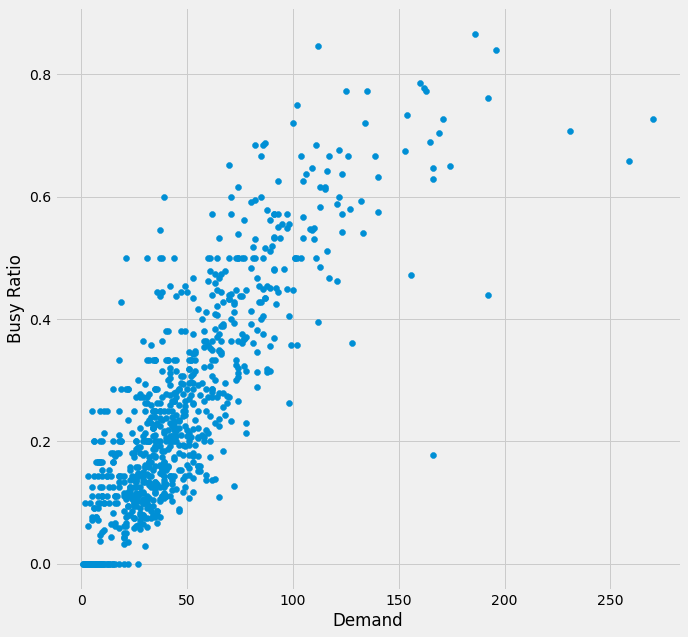

In [677]:
# investigate if there is a relation between high demand and business

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(sd['Demand'], busy_ratio)
plt.xlabel("Demand")
plt.ylabel("Busy Ratio")
plt.show()

In [678]:
sd.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%),Hour,Day of Week,Is Weekend,Is Holyday,Demand,Free Drivers
0,2016-12-18,52,18,6,11,0.3,0.67,12.0,9,32,78,23,6,True,True,41,34.666667
1,2016-12-18,59,20,11,9,0.3,1.40,28.0,29,64,69,22,6,True,True,93,26.550000
2,2016-12-18,72,25,7,18,0.3,0.64,16.0,5,39,89,21,6,True,True,44,51.840000
3,2016-12-18,86,29,7,23,0.3,0.52,15.0,13,48,79,20,6,True,True,61,65.241379
4,2016-12-18,82,31,14,17,0.4,1.16,36.0,12,77,87,19,6,True,True,89,44.967742


In [679]:
sd.describe()

,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%),Hour,Day of Week,Demand,Free Drivers
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,61.648391,23.215733,6.315852,16.914184,0.370083,0.569464,13.990465,12.240763,36.041716,75.661502,11.507747,3.001192,48.282479,44.677813
std,25.928193,11.095697,5.535662,9.068937,0.068212,0.385772,11.540110,16.602303,25.160951,18.342403,6.926799,2.002087,36.190791,20.986116
min,9.000000,2.000000,0.000000,2.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.153846
25%,41.000000,14.000000,2.000000,10.000000,0.300000,0.290000,5.500000,3.000000,19.000000,66.000000,6.000000,1.000000,25.000000,27.623932
50%,63.000000,23.000000,5.000000,16.000000,0.400000,0.500000,11.000000,6.000000,32.000000,80.000000,12.000000,3.000000,40.000000,42.187500
75%,80.500000,31.000000,9.000000,23.000000,0.400000,0.790000,20.000000,14.000000,49.000000,89.000000,17.500000,5.000000,64.000000,59.868687
max,129.000000,56.000000,29.000000,48.000000,0.600000,2.030000,62.000000,129.000000,172.000000,100.000000,23.000000,6.000000,270.000000,109.200000


<AxesSubplot:xlabel='Date'>

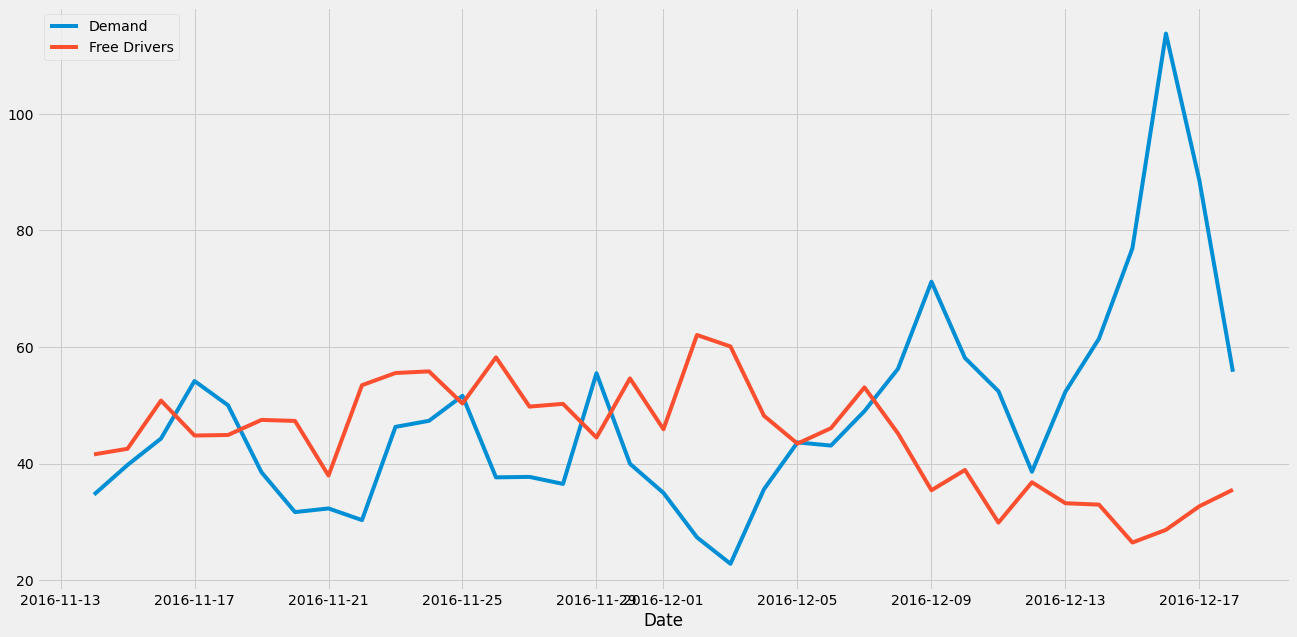

In [680]:
sd.groupby('Date')['Demand'].mean().plot(legend=True)
sd.groupby('Date')['Free Drivers'].mean().plot(legend=True, figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

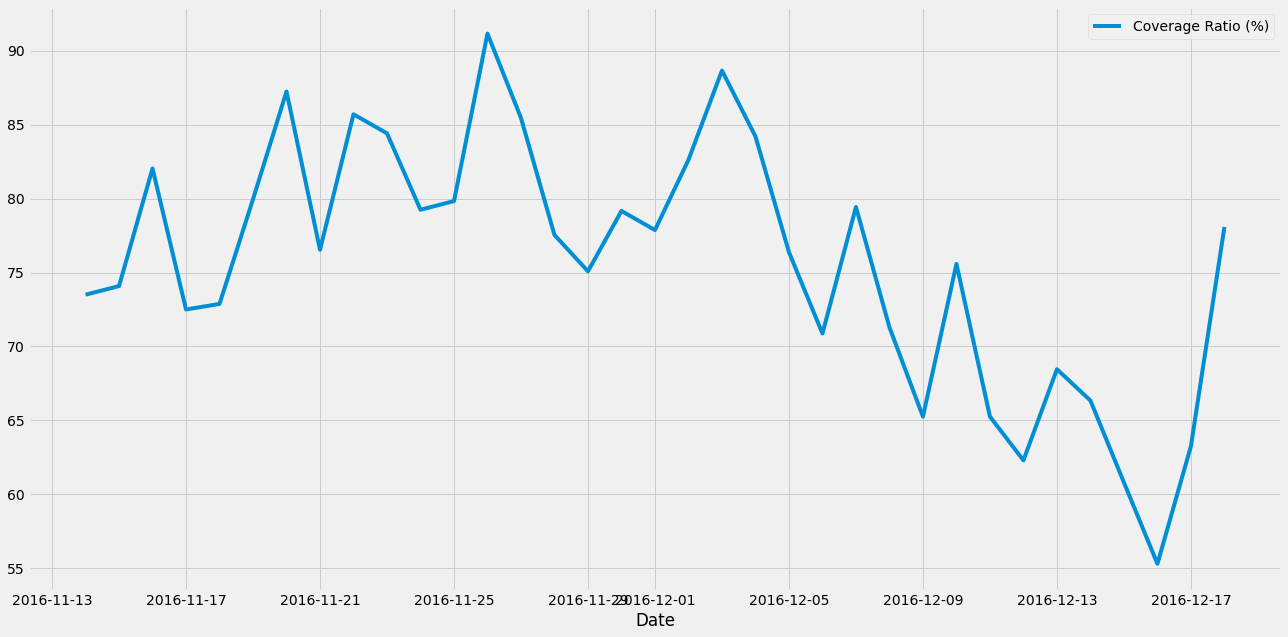

In [681]:
sd.groupby('Date')['Coverage Ratio (%)'].mean().plot(legend=True, figsize=(20, 10))


As we look at the data as a whole, we are able to identify two periods with distinct behaviors: 

1. From Nov 14th until the beginning of December (first two weeks), where supply and demand follow similar trend over time 
2. The last week of the year shows a huge spike on Demand, probably due to the holiday season, while observing a decrease in Supply. 

We should distinguish these dates separately, because results can be skewed due to the holiday season.

## Supply-Demand Gap - Hourly 

<AxesSubplot:xlabel='Hour'>

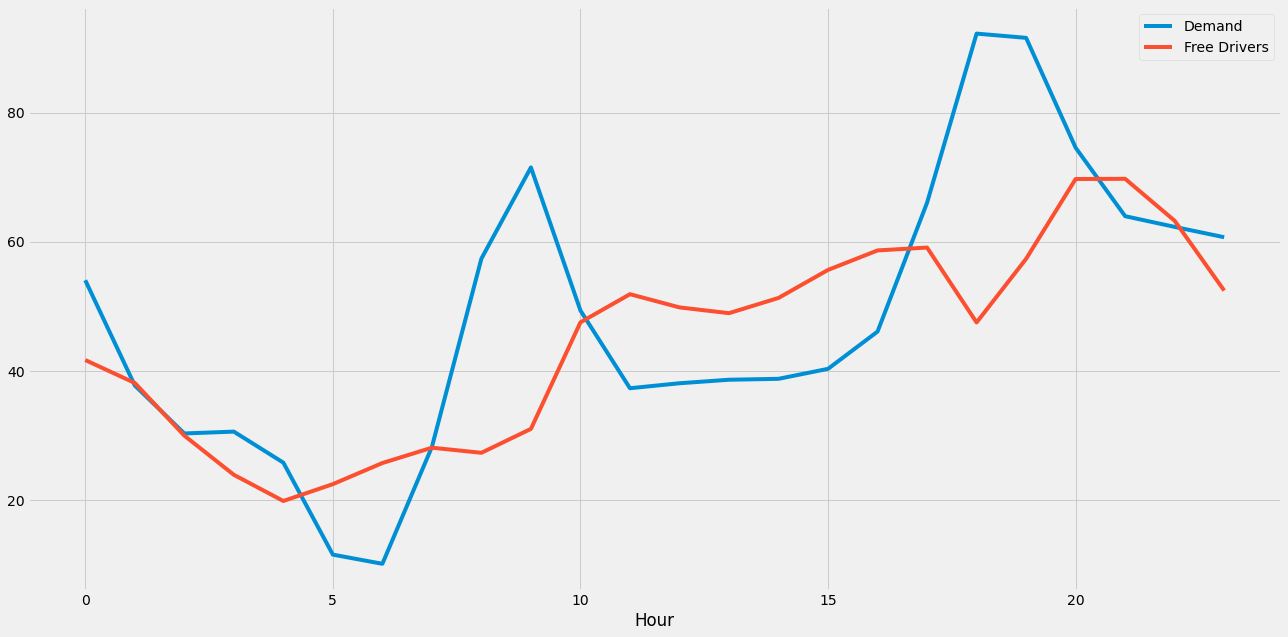

In [682]:
sd.groupby('Hour')['Demand'].mean().plot(legend=True, figsize=(20,10))
sd.groupby('Hour')['Free Drivers'].mean().plot(legend=True)

<AxesSubplot:xlabel='Hour'>

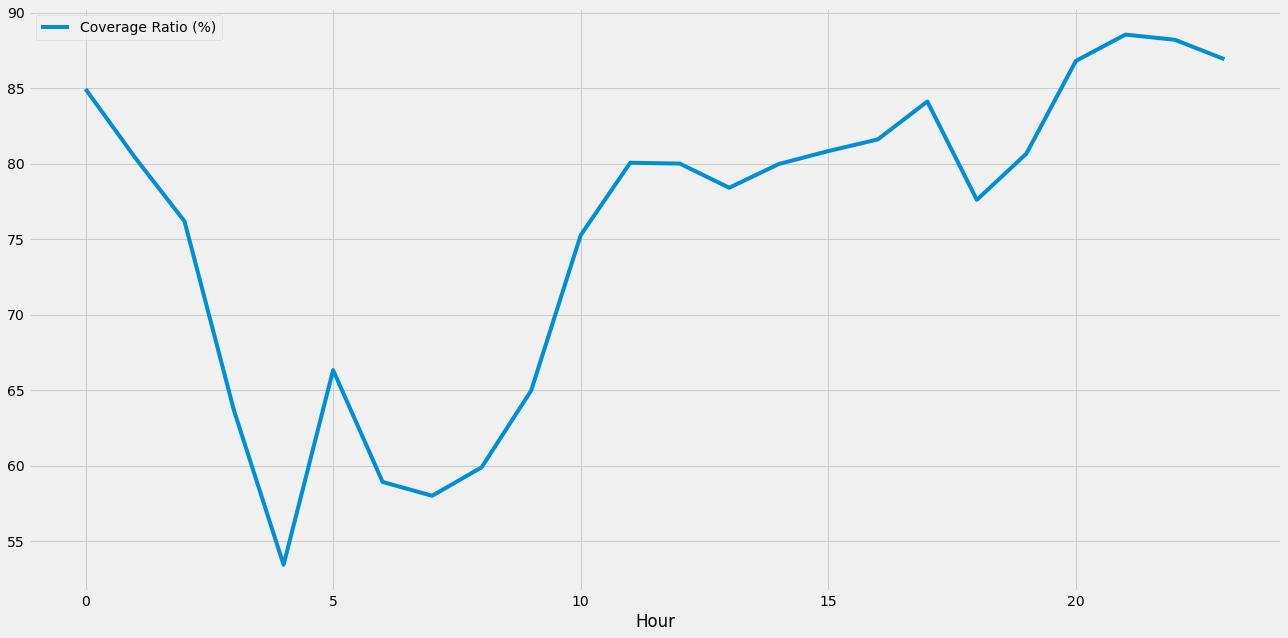

In [683]:
sd.groupby('Hour')['Coverage Ratio (%)'].mean().plot(legend=True, figsize=(20, 10))

Peak hours occurr, aproximately, from 7am-10am and from 5pm-8pm. Probably, because people are going and coming back from work.

However, this pattern might suffer changes depending on the day of the week. below we run a Daily analysis 

## Supply-Demand Gap - Daily 

<AxesSubplot:xlabel='Day of Week,Hour'>

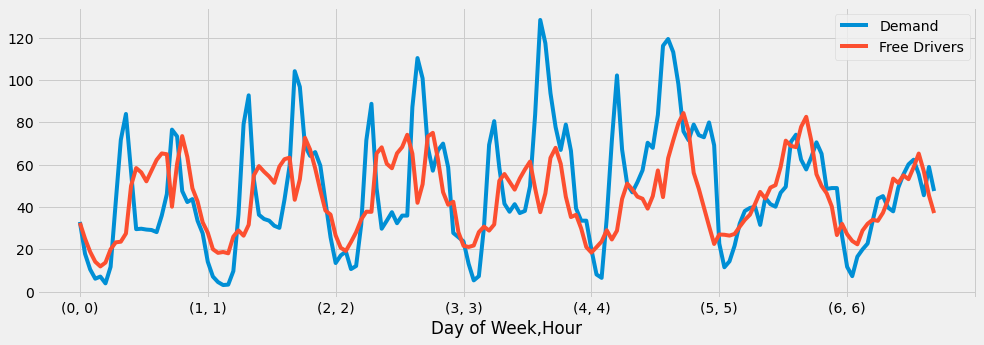

In [684]:
sd.groupby(['Day of Week','Hour'])['Demand'].mean().plot(legend=True, figsize=(15,5))
sd.groupby(['Day of Week','Hour'])['Free Drivers'].mean().plot(legend=True)

<AxesSubplot:xlabel='Day of Week,Hour'>

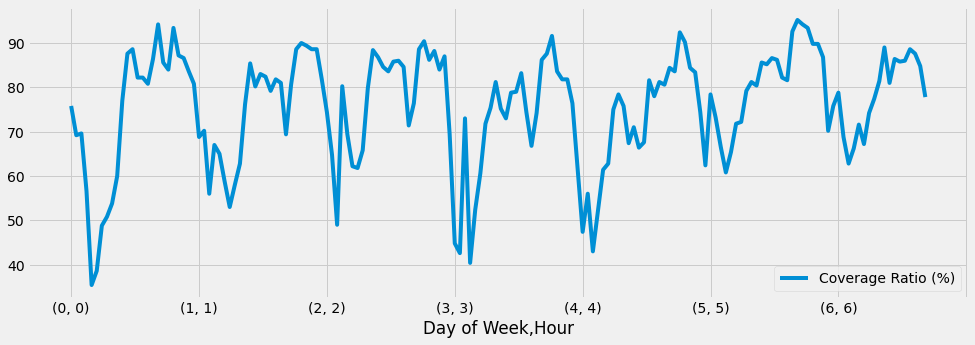

In [685]:
sd.groupby(['Day of Week','Hour'])['Coverage Ratio (%)'].mean().plot(legend=True, figsize=(15,5))


<AxesSubplot:xlabel='Day of Week,Hour'>

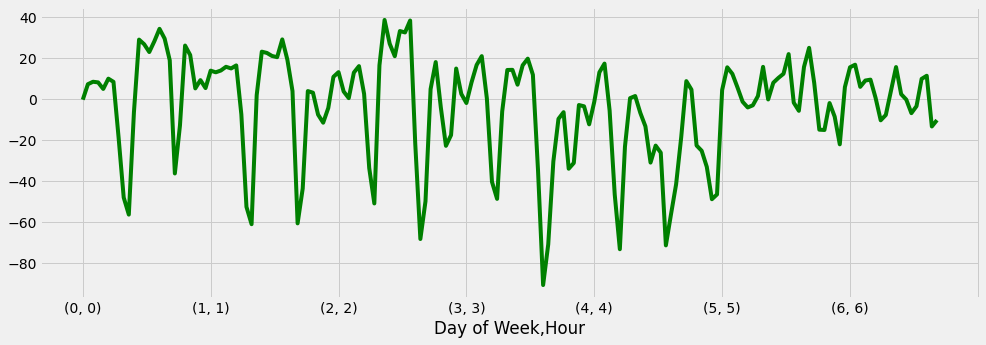

In [686]:
sd_gap = -sd.groupby(['Day of Week','Hour'])['Demand'].mean() + sd.groupby(['Day of Week','Hour'])['Free Drivers'].mean()
color = ['r' if y < 0 else 'g' for y in sd_gap]
sd_gap.plot(figsize=(15,5), color='g')


Weekend Gap is clearly lower than the gap we face during the week.  

### Weekends - Hourly

<AxesSubplot:xlabel='Hour'>

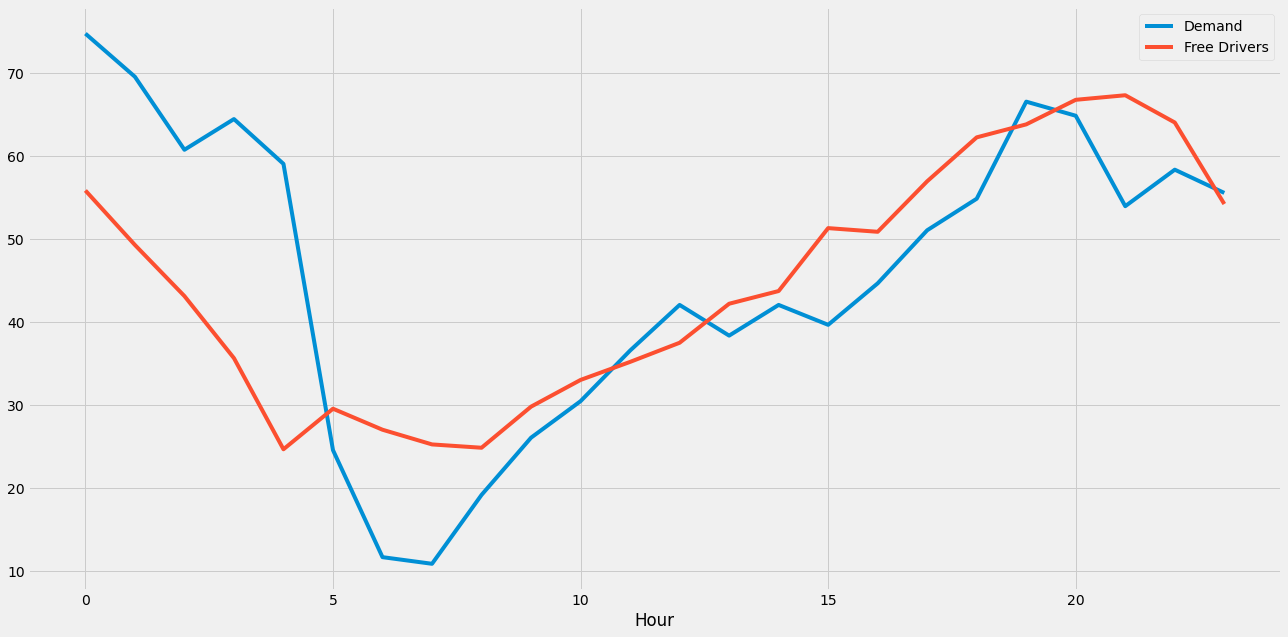

In [687]:
sd[sd['Is Weekend'] == True].groupby('Hour')['Demand'].mean().plot(legend=True, figsize=(20,10))
sd[sd['Is Weekend'] == True].groupby('Hour')['Free Drivers'].mean().plot(legend=True)

During the weekend, peaks occurr more in the early morning (2am-5am). We clearly see a higher amount of Active Drivers during this period. Are drivers more available during the weekend ? double jobs to get extra income ? however, the number of finished rides does not increase considerably. Why ? 

### Fridays

<AxesSubplot:xlabel='Hour'>

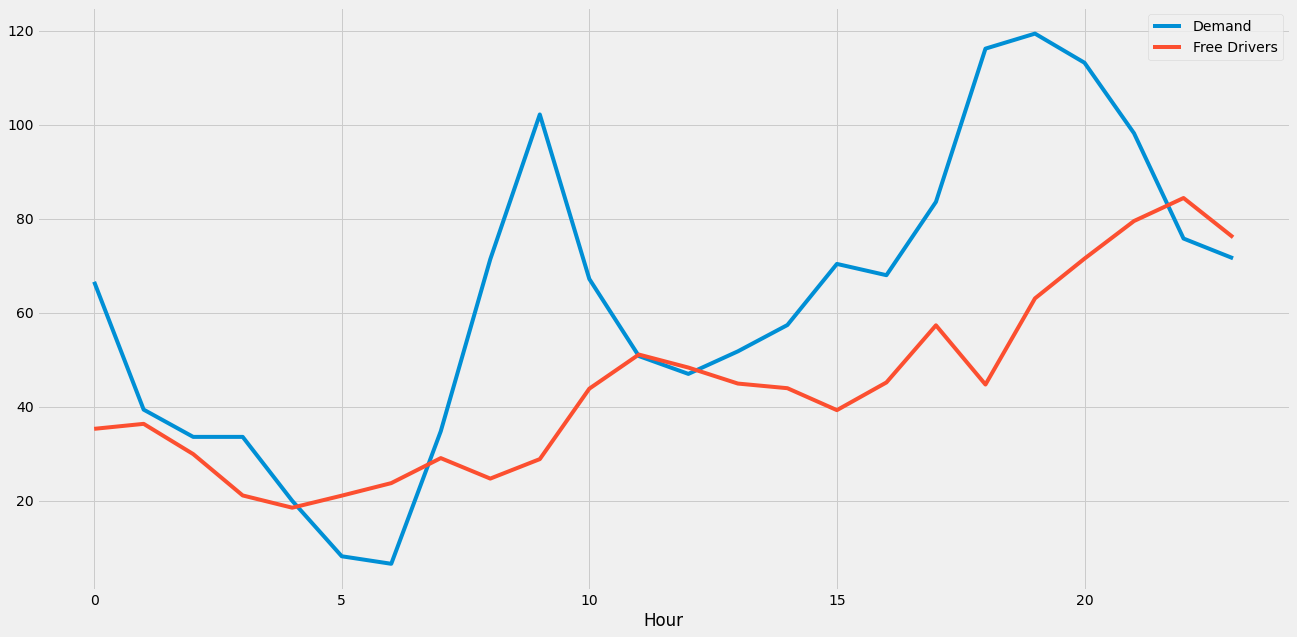

In [688]:
sd[sd['Day of Week'] == 4].groupby('Hour')['Demand'].mean().plot(legend=True, figsize=(20,10))
sd[sd['Day of Week'] == 4].groupby('Hour')['Free Drivers'].mean().plot(legend=True)

### Holyday Season


<AxesSubplot:xlabel='Hour'>

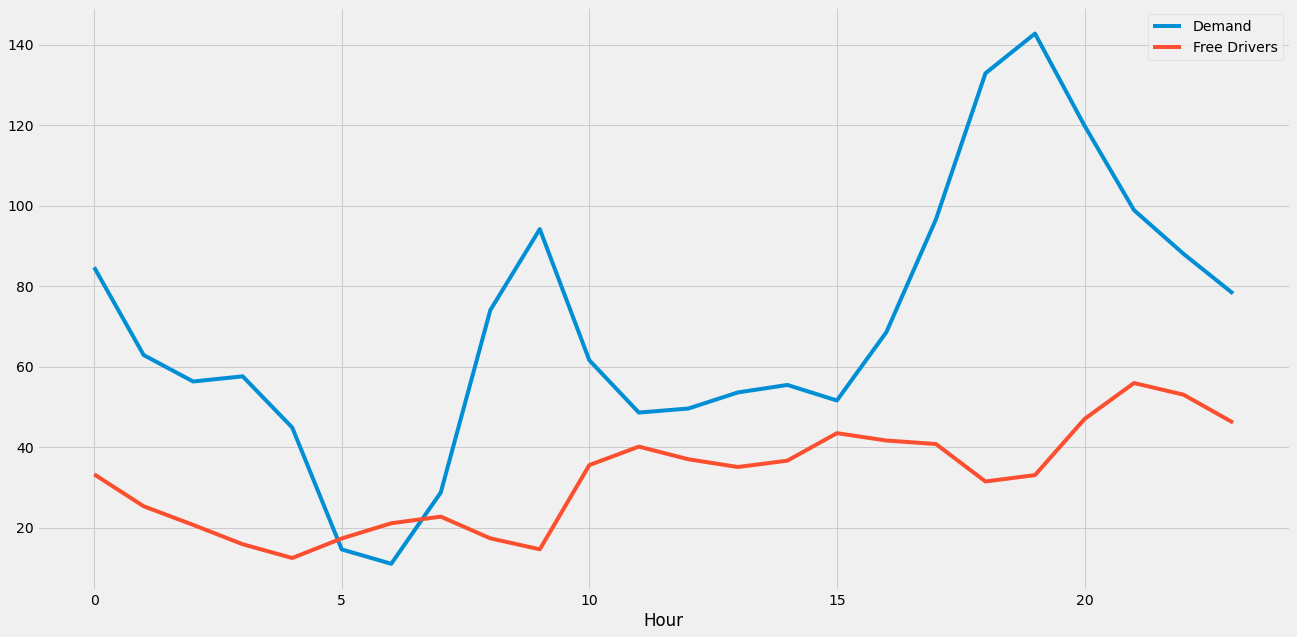

In [689]:
sd[sd['Is Holyday'] == True].groupby('Hour')['Demand'].mean().plot(legend=True, figsize=(20,10))
sd[sd['Is Holyday'] == True].groupby('Hour')['Free Drivers'].mean().plot(legend=True)

In [690]:
sd_gap_weekdays = -(sd[sd['Is Weekend'] == False].groupby('Hour')['Demand'].mean() - sd[sd['Is Weekend'] == False].groupby('Hour')['Free Drivers'].mean())
sd_gap_weekend = -(sd[sd['Is Weekend'] == True].groupby('Hour')['Demand'].mean() - sd[sd['Is Weekend'] == True].groupby('Hour')['Free Drivers'].mean())
sd_gap_friday = -(sd[sd['Day of Week'] == 4].groupby('Hour')['Demand'].mean() - sd[sd['Day of Week'] == 4].groupby('Hour')['Free Drivers'].mean())
sd_gap_holiday = -(sd[sd['Is Holyday'] == True].groupby('Hour')['Demand'].mean() - sd[sd['Is Holyday'] == True].groupby('Hour')['Free Drivers'].mean())

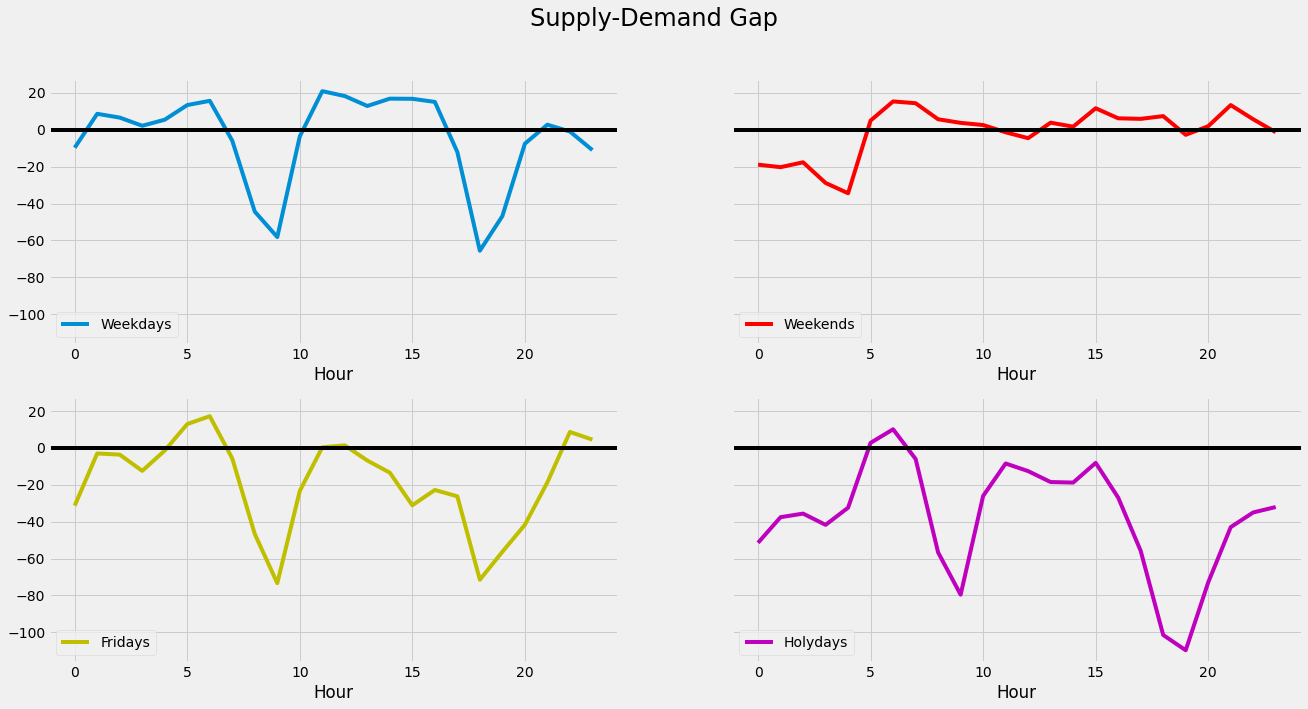

In [691]:
#create subplot figure with having two side by side plots
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(20,10),sharey=True)

# plot first pandas frame in subplot style
sd_gap_weekdays.plot(ax = axes[0,0],subplots=True, label='Weekdays') 
axes[0,0].axhline(0, color='black')
axes[0,0].legend(loc="lower left")

# plot second pandas frame in subplot style
sd_gap_weekend.plot(ax = axes[0,1],subplots=True, label='Weekends', color='r')
axes[0,1].axhline(0, color='black')
axes[0,1].legend(loc="lower left")

# plot third pandas frame in subplot style
sd_gap_friday.plot(ax = axes[1,0],subplots=True, label='Fridays', color='y')
axes[1,0].axhline(0, color='black')
axes[1,0].legend(loc="lower left")

# plot second pandas frame in subplot style
sd_gap_holiday.plot(ax = axes[1,1],subplots=True, label='Holydays', color='m')
axes[1,1].axhline(0, color='black')
axes[1,1].legend(loc="lower left")

plt.ylabel('sd-gap')
plt.suptitle('Supply-Demand Gap', fontsize=24)
plt.show()

Peak hours are: 
- 7am-10am on weekdays 
- 12am-4am Weekends
- both on holidays

In [692]:
def is_peak(x):    
    if x['Is Weekend'] == True:
        return x['Hour'] in ([7,8,9,17,18,19])
    else:
        return x['Hour'] in ([0,1,2,3,4])

sd['is_peak'] = sd.apply(lambda x: is_peak(x), axis=1)
sd.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%),Hour,Day of Week,Is Weekend,Is Holyday,Demand,Free Drivers,is_peak
0,2016-12-18,52,18,6,11,0.3,0.67,12.0,9,32,78,23,6,True,True,41,34.666667,False
1,2016-12-18,59,20,11,9,0.3,1.40,28.0,29,64,69,22,6,True,True,93,26.550000,False
2,2016-12-18,72,25,7,18,0.3,0.64,16.0,5,39,89,21,6,True,True,44,51.840000,False
3,2016-12-18,86,29,7,23,0.3,0.52,15.0,13,48,79,20,6,True,True,61,65.241379,False
4,2016-12-18,82,31,14,17,0.4,1.16,36.0,12,77,87,19,6,True,True,89,44.967742,True


## Q2

In [693]:
sd_peak = sd[sd['is_peak'] ==True]

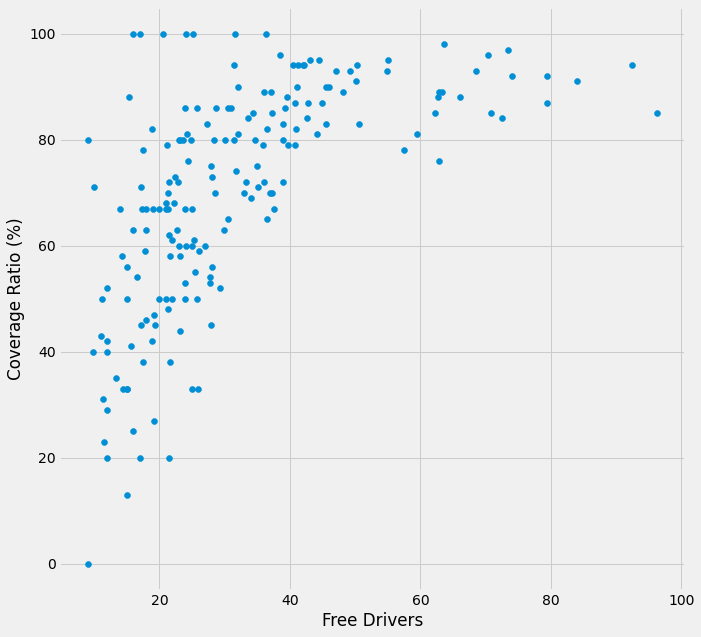

In [694]:
# investigate if there is a linear relationship between active drivers and Online hours.

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(sd_peak['Free Drivers'], sd_peak['Coverage Ratio (%)'])
plt.xlabel("Free Drivers")
plt.ylabel("Coverage Ratio (%)")
plt.show()

We can tell that, during peak hours, if we can guarantee at lease 40 Free Drivers, we have a Coverage Rate above 80%. 

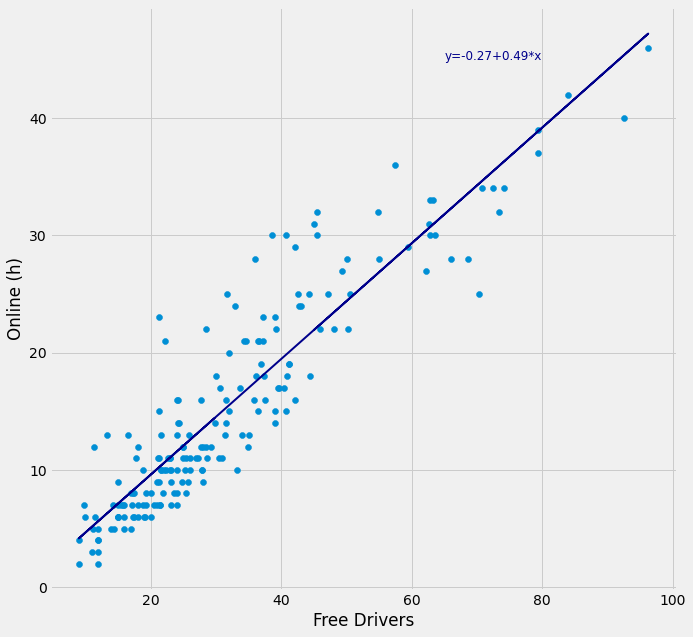

In [695]:
# investigate if there is a linear relationship between active drivers and Online hours.

X = sd_peak['Free Drivers']
y = sd_peak['Online (h)']

fit = np.polyfit(X,y, 1)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(X, y)

# regression line
plt.plot(X, fit[0] * X + fit[1], color='darkblue', linewidth=2)
plt.text(65, 45, 'y={:.2f}+{:.2f}*x'.format(fit[1], fit[0]), color='darkblue', size=12)

plt.xlabel("Free Drivers")
plt.ylabel("Online (h)")
plt.show()

In [696]:
fit[0] * 40 + fit[1]

19.453969430842008

In order to have on average 40 Free Drivers available and hence a coverage ratio of at least 80% during peak hours, we will need to guarantee ~20 Online hours. 

## Q3

In [698]:
sd_peak.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%),Hour,Day of Week,Is Weekend,Is Holyday,Demand,Free Drivers,is_peak
4,2016-12-18,82,31,14,17,0.4,1.16,36.0,12,77,87,19,6,True,True,89,44.967742,True
5,2016-12-18,81,32,14,18,0.4,1.00,32.0,13,62,83,18,6,True,True,75,45.562500,True
6,2016-12-18,72,30,13,17,0.4,0.87,26.0,9,61,87,17,6,True,True,70,40.800000,True
14,2016-12-18,22,7,1,6,0.3,0.14,1.0,7,5,42,9,6,True,True,12,18.857143,True
15,2016-12-18,24,7,1,6,0.3,0.29,2.0,0,10,100,8,6,True,True,10,20.571429,True


In [723]:
sd.describe()

,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%),Hour,Day of Week,Demand,Free Drivers
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,61.648391,23.215733,6.315852,16.914184,0.370083,0.569464,13.990465,12.240763,36.041716,75.661502,11.507747,3.001192,48.282479,44.677813
std,25.928193,11.095697,5.535662,9.068937,0.068212,0.385772,11.540110,16.602303,25.160951,18.342403,6.926799,2.002087,36.190791,20.986116
min,9.000000,2.000000,0.000000,2.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.153846
25%,41.000000,14.000000,2.000000,10.000000,0.300000,0.290000,5.500000,3.000000,19.000000,66.000000,6.000000,1.000000,25.000000,27.623932
50%,63.000000,23.000000,5.000000,16.000000,0.400000,0.500000,11.000000,6.000000,32.000000,80.000000,12.000000,3.000000,40.000000,42.187500
75%,80.500000,31.000000,9.000000,23.000000,0.400000,0.790000,20.000000,14.000000,49.000000,89.000000,17.500000,5.000000,64.000000,59.868687
max,129.000000,56.000000,29.000000,48.000000,0.600000,2.030000,62.000000,129.000000,172.000000,100.000000,23.000000,6.000000,270.000000,109.200000


<AxesSubplot:xlabel='Hour'>

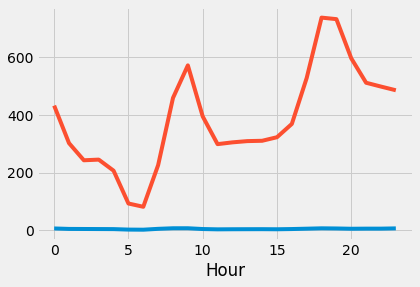

In [722]:
(sd.groupby('Hour')['Online (h)'].mean() * sd.groupby('Hour')['Rides per online hour'].mean() * 10 * 0.8 / (sd.groupby('Hour')['Active drivers'].mean() * sd.groupby('Hour')['Hours per active driver'].mean()) ).plot()
(10*0.8*sd.groupby('Hour')['Demand'].mean()).plot()